In [1086]:
# Import data science essentials
import pandas as pd
import numpy as np
from datetime import datetime,timedelta

# Import plotting essentials
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

import copy
from numpy import matlib


In [1087]:
btc_file = 'coin_Bitcoin.csv'
eth_file = 'coin_Ethereum.csv'

In [1088]:
btc_df = pd.read_csv(btc_file,index_col='Date',parse_dates=True)
eth_df = pd.read_csv(eth_file,index_col='Date',parse_dates=True)

In [1089]:
last_date = btc_df.index.max()
year = last_date - timedelta(days=359)

end_date = f"{last_date.year}-{last_date.month}-{last_date.day}"
start_date = f"{year.year}-{year.month}-{year.day}"

In [1090]:
a = btc_df[start_date:end_date]
b = eth_df[start_date:end_date]

In [1091]:
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure(dpi=200)

# # Set up x-axis moving window
# moving_window = 100
# x_last = a.index.min()+timedelta(days=moving_window)
# x_first = a.index.min()

# # Update plot with starting background axis and labels
# ax = plt.axes(xlim=(x_first,x_last),ylim=(0,70000))
# line, = ax.plot([], [], lw=1,label='BTC PRICE')
# line.axes.tick_params(axis='x', labelrotation = 45)
# plt.legend()

In [1092]:
# # initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return line,

In [1093]:
# moving_window = 100
# x_last = a.index.min()+timedelta(days=moving_window)
# x_first = a.index.min()
# dt = timedelta(days=1)

# def animate(i):
#     global x_last
#     global x_first
#     global dt
    
#     x = a.index[:i]
#     y = a['Close'][:i]
#     line.set_data(x, y)
    
#     if a.index[i] >= x_last-dt:
#         x_last += dt 
#         x_first += dt
#         line.axes.set_xlim(x_first,x_last)
        
#     return line,

In [1094]:
# anim = animation.FuncAnimation(fig, animate, init_func=init,frames=len(a.index), interval=100, blit=False)

In [1095]:
# # equivalent to rcParams['animation.html'] = 'html5'
# rc('animation', html='html5')

In [1096]:
# anim

In [1097]:
log_close_btc = a['Close']

In [1098]:
#log_close_btc = np.log(log_close_btc)

In [1099]:
log_close_btc

Date
2020-07-12 23:59:59     9276.499850
2020-07-13 23:59:59     9243.613855
2020-07-14 23:59:59     9243.213416
2020-07-15 23:59:59     9192.837368
2020-07-16 23:59:59     9132.227863
                           ...     
2021-07-02 23:59:59    33897.048590
2021-07-03 23:59:59    34668.548402
2021-07-04 23:59:59    35287.779766
2021-07-05 23:59:59    33746.002456
2021-07-06 23:59:59    34235.193451
Name: Close, Length: 360, dtype: float64

In [1100]:
log_close_eth = b['Close']
#log_close_eth = np.log(log_close_eth)
log_close_eth

Date
2020-07-12 23:59:59     242.131695
2020-07-13 23:59:59     239.604585
2020-07-14 23:59:59     240.211494
2020-07-15 23:59:59     238.423527
2020-07-16 23:59:59     233.640883
                          ...     
2021-07-02 23:59:59    2150.040364
2021-07-03 23:59:59    2226.114282
2021-07-04 23:59:59    2321.724112
2021-07-05 23:59:59    2198.582464
2021-07-06 23:59:59    2324.679449
Name: Close, Length: 360, dtype: float64

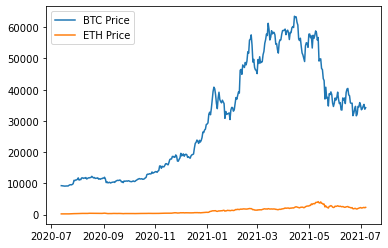

In [1101]:
plt.plot(log_close_btc.index,log_close_btc, label="BTC Price")
plt.plot(log_close_eth.index,log_close_eth, label="ETH Price")
plt.legend()
plt.show()

In [1102]:
spread_btc = log_close_btc
spread_eth = log_close_eth
# for i in range(1,len(log_close_btc)): 
#     spread_btc.append(log_close_btc[i]-log_close_btc[i-1])
#     spread_eth.append(log_close_eth[i]-log_close_eth[i-1])

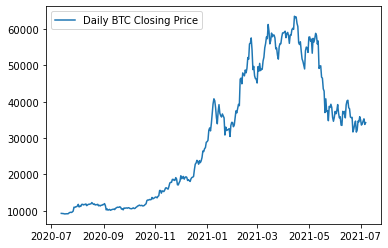

In [1103]:
plt.plot(log_close_btc.index[:],spread_btc, label='Daily BTC Closing Price')
plt.legend()
plt.show()

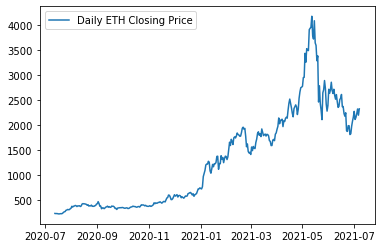

In [1104]:
plt.plot(log_close_eth.index[:],spread_eth, label='Daily ETH Closing Price')
plt.legend()

In [1105]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

def cointegration_test(Y, X):
    # Step 1: regress on variable on the other 
    ols_result = sm.OLS(Y, X).fit() 
    # Step 2: obtain the residual (ols_resuld.resid)
    # Step 3: apply Augmented Dickey-Fuller test to see whether 
    #        the residual is unit root    
    return ts.adfuller(ols_result.resid)

In [1106]:
cointegration_test(spread_btc,spread_eth)

(-1.4232607015479724,
 0.5710752511894234,
 14,
 345,
 {'1%': -3.4494474563375737,
  '5%': -2.8699542285903887,
  '10%': -2.5712527305187987},
 6028.6262229551085)

In [1107]:
ols_result=sm.OLS(spread_btc, spread_eth).fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.894
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              3018.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):                   8.16e-177
Time:                        19:43:17   Log-Likelihood:                         -3875.4
No. Observations:                 360   AIC:                                      7753.
Df Residuals:                     359   BIC:                                      7757.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Close         20.6809      0.376     54.938      0.000      19.941      21.421
==============================================================================
Omnibus:                       54.634   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.640
Skew:                          -1.018   Prob(JB):                     2.28e-17
Kurtosis:                       3.982   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

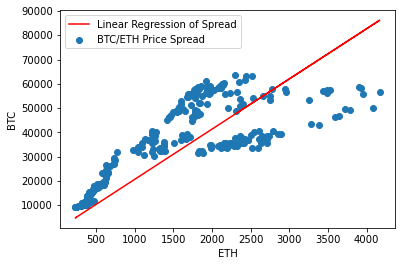

Close    20.680907
dtype: float64


In [1108]:
# This analysis is not used in the model it was just some prelimenary analysis
plt.scatter(spread_eth,spread_btc,label='BTC/ETH Price Spread')
plt.plot(spread_eth, ols_result.predict(),label='Linear Regression of Spread',c="red")
plt.legend()
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.show()

print(ols_result.params)

In [1109]:
lookback=10
hedgeRatio=np.empty(len(spread_btc))
hedgeRatio[:]=np.nan

for t in range(lookback,len(hedgeRatio),1):
    
    regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
    hedgeRatio[t]=regression_result.params[0]

In [1110]:
# Testing how sm.OLS module works
# lookback=20
# t=lookback
# regression_result=sm.OLS(spread_btc[t-lookback:t],spread_eth[t-lookback:t]).fit()
# regression_result.params

In [1111]:
# y2 = [independent_spread dependent_spread]
y2 = np.array([spread_eth, spread_btc]).transpose()

# introducing massive amounts of look-ahead bias :)
hedgeRatio_df = pd.DataFrame(hedgeRatio,columns=['Hedge Ratio'])
hedgeRatio_df.fillna(method='bfill',inplace=True)
hedgeRatio_df['Ones'] = np.ones(len(spread_btc))
#hedgeRatio = copy.deepcopy(hedgeRatio_df.to_numpy())
hedgeRatio1 = copy.deepcopy(hedgeRatio_df)

hedgeRatio1

,Hedge Ratio,Ones
0,38.671522,1.0
1,38.671522,1.0
2,38.671522,1.0
3,38.671522,1.0
4,38.671522,1.0
...,...,...
355,16.781654,1.0
356,16.622315,1.0
357,16.470419,1.0
358,16.229099,1.0


In [1112]:
hedgeRatio1['Hedge Ratio'] = hedgeRatio1['Hedge Ratio']*-1.0
hedgeRatio1

,Hedge Ratio,Ones
0,-38.671522,1.0
1,-38.671522,1.0
2,-38.671522,1.0
3,-38.671522,1.0
4,-38.671522,1.0
...,...,...
355,-16.781654,1.0
356,-16.622315,1.0
357,-16.470419,1.0
358,-16.229099,1.0


In [1113]:
#yport = np.sum(np.multiply(np.array([-hedgeRatio, np.ones(len(spread_btc))]).transpose(),y2),axis=1)
yport = np.sum(np.multiply(hedgeRatio1,y2),axis=1)
yport

0       -87.101295
1       -22.260086
2       -46.130632
3       -27.363267
4        96.979348
          ...     
355   -2184.185733
356   -2334.623454
357   -2951.990101
358   -1935.010600
359   -3071.923752
Length: 360, dtype: float64

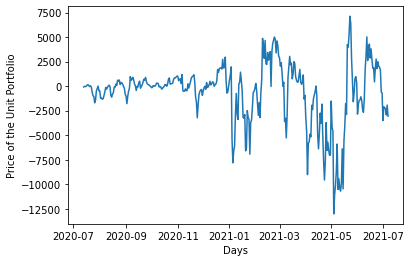

In [1114]:
plt.plot(log_close_btc.index,yport)
plt.xlabel('Days')
plt.ylabel('Price of the Unit Portfolio')
plt.show()

In [1115]:
# l = log_close_btc.reset_index().index.to_numpy()
# # l = [range(len(log_close_btc))]
# cointegration_test(yport,l)

In [1116]:
yport_df = pd.DataFrame(yport,index=log_close_btc.index,columns=['Spread'])

yport_df

,Spread
Date,
2020-07-12 23:59:59,NaN
2020-07-13 23:59:59,NaN
2020-07-14 23:59:59,NaN
2020-07-15 23:59:59,NaN
2020-07-16 23:59:59,NaN
...,...
2021-07-02 23:59:59,NaN
2021-07-03 23:59:59,NaN
2021-07-04 23:59:59,NaN


In [1117]:
# # Bollinger band strategy was a total failure! Using Linear Mean Reversion Instead
# entryZscore=-1
# exitZscore=1

# # Calculates zScore for every day in the spread
# zScore=(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

# # Sets longsEntry array to zScore value if below entry threshold
# longsEntry=zScore < entryZscore

# # Sets longsExit array to zScore value if above exit threshold
# longsExit=zScore >= exitZscore

# # Set shortsEntry array to zScore value if above entry threshold
# shortsEntry=zScore > -entryZscore

# # Set shortsEntry array to zScore value if below exit threshold
# shortsExit=zScore <= -exitZscore

# # Setting Up simulated long trades
# numUnitsLong=np.empty(len(yport_df))
# numUnitsLong[:]=np.nan

# # Setting up simulated short trades
# numUnitsShort=np.empty(len(yport_df))
# numUnitsShort[:]=np.nan

# # Convert np long arrays to dfs
# numUnitsLong[0]=0
# numUnitsLong = pd.DataFrame(numUnitsLong)
# # Convert np short arrays to dfs
# numUnitsShort[0]=0
# numUnitsShort = pd.DataFrame(numUnitsShort)

# numUnitsLong[0].iloc[longsEntry.reset_index().loc[longsEntry.reset_index()['Spread']==True].index]=1
# numUnitsLong[0].iloc[longsExit.reset_index().loc[longsExit.reset_index()['Spread']==True].index]=0

# numUnitsLong.fillna(method='ffill',inplace=True)


# numUnitsShort[0].iloc[shortsEntry.reset_index().loc[shortsEntry.reset_index()['Spread']==True].index]=-1
# numUnitsShort[0].iloc[shortsExit.reset_index().loc[shortsExit.reset_index()['Spread']==True].index]=0

# numUnitsShort.fillna(method='ffill',inplace=True)

# numUnits= numUnitsLong + numUnitsShort
# numUnits.fillna(0)
# numUnits



In [1118]:
zScore=-(yport_df-yport_df.rolling(window=lookback).mean())/yport_df.rolling(window=lookback).std()

zScore.fillna(method='bfill',inplace=True)

In [1119]:
import copy
y3 = copy.deepcopy(y2)
y3


array([[  242.13169523,  9276.49985018],
       [  239.60458484,  9243.61385509],
       [  240.21149418,  9243.21341642],
       [  238.42352695,  9192.83736784],
       [  233.64088301,  9132.22786293],
       [  232.77308561,  9151.39223963],
       [  235.48380522,  9159.03990531],
       [  238.48752372,  9185.81691242],
       [  236.15316771,  9164.2313647 ],
       [  245.01672849,  9374.88752808],
       [  262.19065629,  9525.36344997],
       [  274.68904905,  9581.07201141],
       [  279.21540948,  9536.89268563],
       [  304.0567612 ,  9677.11349729],
       [  309.64360929,  9905.16724705],
       [  321.51408818, 10990.8733998 ],
       [  316.65725234, 10912.8230505 ],
       [  318.19088442, 11100.4681253 ],
       [  334.58662928, 11111.2142899 ],
       [  345.55464931, 11323.4664207 ],
       [  385.19971932, 11759.5927707 ],
       [  370.67171149, 11053.613901  ],
       [  386.29517344, 11246.3487749 ],
       [  389.87548514, 11205.8929179 ],
       [  401.59

In [1120]:
#positions = np.multiply(matlib.repmat(numUnits,1,2),np.array([hedgeRatio, -np.ones(hedgeRatio.size)]).transpose(),y2)

In [1121]:
#numUnits

In [1122]:
# Positions array for Linear Mean Reversion Strategy
positions = np.multiply(matlib.repmat(zScore,1,2),np.array([hedgeRatio_df, -np.ones(hedgeRatio.size)]).transpose(),y2)

<ipython-input-1122-47d9f264f27a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  positions = np.multiply(matlib.repmat(zScore,1,2),np.array([hedgeRatio_df, -np.ones(hedgeRatio.size)]).transpose(),y2)


ValueError: could not broadcast input array from shape (360,2) into shape (360)

In [ ]:
zScore.head(10)

In [ ]:
pnl_arr = []
    
for i in range(y3.shape[0]-1):
        
    independent_return = positions[i+1,0]*(y3[i,0]-y3[i+1,0])/y3[i+1,0]
    dependent_return = positions[i+1,1]*(y3[i,1]-y3[i+1,1])/y3[i+1,1]
    daily_pnl = independent_return+dependent_return
        
    pnl_arr.append(daily_pnl)


In [ ]:
ret_arr = []
    
for i in range(y3.shape[0]-1):
    
    if (abs(positions[i+1,0])+abs(positions[i+1,1])) == 0:
        ret = 0
    else:
        ret = pnl_arr[i]/(abs(positions[i+1,0])+abs(positions[i+1,1]))
        
    ret_arr.append(ret)

In [ ]:
plt.plot(np.arange(len(ret_arr)),ret_arr)
plt.xlabel('Days')
plt.ylabel('Dialy Returns')
plt.show()

In [ ]:
c = [1]*len(ret_arr)
c = np.array(c)
ret_arr = np.array(ret_arr)
ret_arr1 = ret_arr+c
cumulative_ret = ret_arr1.cumprod()

In [ ]:
array1 = cumulative_ret

nan_array = np.isnan(array1)
not_nan_array = ~ nan_array
array2 = array1[not_nan_array]

In [ ]:
stop=100
plt.plot(np.arange(len(array2)),array2)
plt.xlabel('Days')
plt.ylabel('Cumulative Returns')

In [ ]:
ret_arr1

In [ ]:
ret_arr

In [ ]:
array2

In [ ]:
np.arange(len(array2[:20]))